# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

## What is success

offer received -> offer viewed

offer received -> offer viewed -> offer completed

offer received -> offer completed

offer received 


Among all above conditions onlly the 2nd is success, because this is what we want the user to do, So lets create a new column for success

And the 3rd one is complete failure as we never want that to happen

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import math
import json

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Questions

For completing this project, I am going to answer several questions according to the given datasets. The questions below are formed in order to know better about customers behaviour and interaction with the offers.

If we can map the behaviour and find some specific patterns about customers behaviour in using offers, hopefully the marketing team will target the right customers to be able to increase the sales.

Here are a few questions we are going to answer in this notebook.

- Does the offer it self affect how customers interact with it
- Does type of offer determine how customers interact with it
- Does gender play a role in how customer react to offers
- Does income of the customer affect how they respond to offers 
- Can we create a model which can predict how a customers will react to an offer

Before we answer the questions, we are going to do the data wrangling process.

 ## Portfolio

In [37]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64


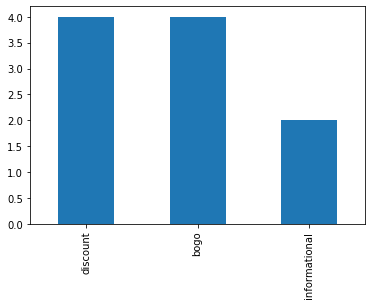

In [38]:
# Lets see how many offers or a type we have
print(portfolio['offer_type'].value_counts())
portfolio['offer_type'].value_counts().plot.bar();

* We can see that we have same no of discount and blob offeres

## Profile

In [39]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


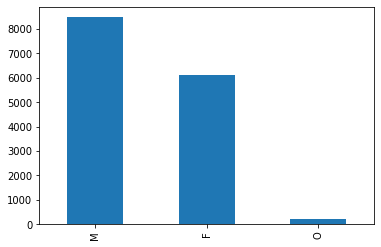

In [40]:
# How the data seems when we look at different genders
profile['gender'].value_counts().plot.bar();

* So we have highest number fo mails

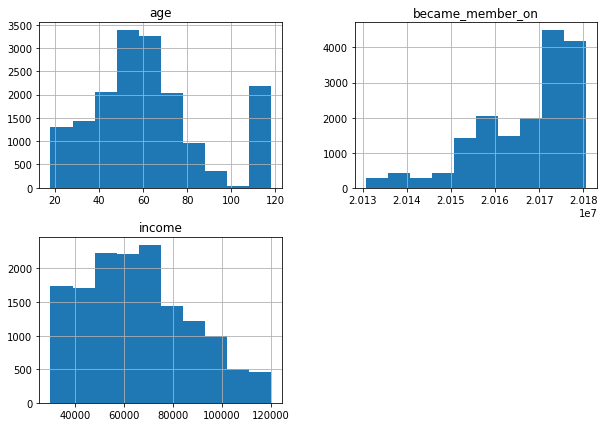

In [41]:
profile.hist(figsize=(10, 7));

Some thing seems odd over to the age section

In [42]:
# Lets look at the age more carefullly
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [43]:
profile['age'].mode()

0    118
dtype: int64

Wow it seems like we have a bunch of 118 year olds, or is somthing odd, lets look in little more detail

In [44]:
profile[profile['age']==118]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [45]:
# Sets see if we can find it suing other row with same id
profile[profile.duplicated(subset=['id'])]

,gender,age,id,became_member_on,income


So we don't have duplicate values for id so we cant fill it using other row

In [46]:
profile[(profile['age']==118) & (profile['gender'].notnull())]

,gender,age,id,became_member_on,income


In [47]:
profile[(profile['age']==118) & (profile['income'].notnull())]

,gender,age,id,became_member_on,income


In [48]:
len(profile)

17000

we know if age==118 then gender=Nan & income=Nan

So we will need to deal with this

**lets clean the data**

1. Creating dummy variables for gender, and droping gender
1. Convert became_member_on to date
1. Rename id to profile_id
1. Remove rows with age==118

lest look for more missing values

So now we have no missing values

## Transcript

In [49]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [50]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


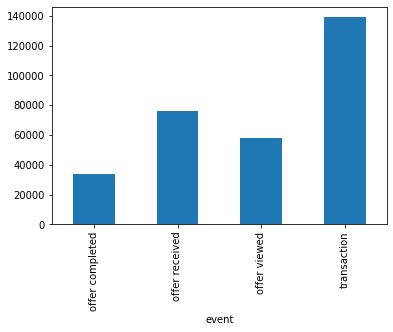

In [51]:
transcript.groupby('event').count()['person'].plot.bar()

In [52]:
transcript['value'].apply(lambda value: str(list(value.keys()))).unique()

array(["['offer id']", "['amount']", "['offer_id', 'reward']"],
      dtype=object)

**lest clean the data**

1. Create dummy variables for events
1. Create dummy variables for data in value
1. Convert tie from hrs to days to make it same as in portfolio
1. Rename person to profile_id
1. Get only those transcripts which have an offere id, hence offer (Therefore remove "offer received" column)

In [53]:
transcript_df = transcript.copy()

# Rename person to profile_id
transcript_df = transcript_df.rename(columns={'person': 'profile_id'})

# Creating dummy variables for events
transcript_df = transcript_df.join(pd.get_dummies(transcript_df['event']))
transcript_df = transcript_df.drop('event', axis=1)

# Creating  offer_id, amount and reward from value column, 
#    we know it has 2 names in data offer id & offer_id
transcript_df['offer_id'] = transcript_df['value'].apply(
    lambda value: value.get('offer id') if value.get('offer id') else value.get('offer_id', np.nan)
)
transcript_df['amount'] = transcript_df['value'].apply(
    lambda value: value.get('amount', np.nan)
)

transcript_df['reward'] = transcript_df['value'].apply(
    lambda value: value.get('reward', np.nan)
)
transcript_df = transcript_df.drop('value', axis=1)

# Convert time from hrs to days
transcript_df['time'] /= 24.0

# Filling na with -1 so we dont loos the data when we group them
transcript_df['offer_id'] = transcript_df[['offer_id']].fillna(-1)

# Groupping by offere id , 
transcript_df = transcript_df.groupby(['offer_id', 'profile_id']).max().reset_index()

transcript_df

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward
0,-1,0009655768c64bdeb2e877511632db8f,29.00,0,0,0,1,28.16,NaN
1,-1,00116118485d4dfda04fdbaba9a87b5c,19.75,0,0,0,1,3.19,NaN
2,-1,0011e0d4e6b944f998e987f904e8c1e5,27.25,0,0,0,1,23.03,NaN
3,-1,0020c2b971eb4e9188eac86d93036a77,29.50,0,0,0,1,33.86,NaN
4,-1,0020ccbbb6d84e358d3414a3ff76cffd,28.00,0,0,0,1,20.08,NaN
...,...,...,...,...,...,...,...,...,...
79861,fafdcd668e3743c1bb461111dcafc2a4,fff29fb549084123bd046dbc5ceb4faa,7.00,1,1,1,0,NaN,2.0
79862,fafdcd668e3743c1bb461111dcafc2a4,fff3ba4757bd42088c044ca26d73817a,0.25,1,1,1,0,NaN,2.0
79863,fafdcd668e3743c1bb461111dcafc2a4,fff7576017104bcc8677a8d63322b5e1,24.75,1,1,1,0,NaN,2.0
79864,fafdcd668e3743c1bb461111dcafc2a4,fff8957ea8b240a6b5e634b6ee8eafcf,18.00,0,1,1,0,NaN,NaN


In [54]:
transcript_df.describe()

,time,offer completed,offer received,offer viewed,transaction,amount,reward
count,79866.000000,79866.000000,79866.000000,79866.000000,79866.000000,16578.000000,28996.000000
mean,18.595836,0.363058,0.792427,0.615218,0.207573,31.030820,4.911643
std,8.315975,0.480884,0.405572,0.486547,0.405572,81.283816,2.883599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,2.000000
25%,14.000000,0.000000,1.000000,0.000000,0.000000,7.330000,2.000000
50%,21.000000,0.000000,1.000000,1.000000,0.000000,19.165000,5.000000
75%,25.000000,1.000000,1.000000,1.000000,0.000000,29.680000,5.000000
max,29.750000,1.000000,1.000000,1.000000,1.000000,1062.280000,10.000000


In [55]:
# Droping reward because it has missing values in transcript, and portfolio has all rewards, and they are the same
transcript_portfolio = transcript_df.drop('reward', axis=1).merge(portfolio, left_on='offer_id', right_on='id')
transcript_portfolio = transcript_portfolio.drop('id', axis=1)
transcript_portfolio

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,difficulty,duration,offer_type
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",20,10,discount
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,003d66b6608740288d6cc97a6903f4f0,29.00,1,1,0,0,NaN,5,"[web, email]",20,10,discount
2,0b1e1539f2cc45b7b9fa7c272da2e1d7,00426fe3ffde4c6b9cb9ad6d077a13ea,14.00,0,1,0,0,NaN,5,"[web, email]",20,10,discount
3,0b1e1539f2cc45b7b9fa7c272da2e1d7,0056df74b63b4298809f0b375a304cf4,17.25,1,1,0,0,NaN,5,"[web, email]",20,10,discount
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,0063def0f9c14bc4805322a488839b32,24.00,0,1,1,0,NaN,5,"[web, email]",20,10,discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63283,fafdcd668e3743c1bb461111dcafc2a4,fff29fb549084123bd046dbc5ceb4faa,7.00,1,1,1,0,NaN,2,"[web, email, mobile, social]",10,10,discount
63284,fafdcd668e3743c1bb461111dcafc2a4,fff3ba4757bd42088c044ca26d73817a,0.25,1,1,1,0,NaN,2,"[web, email, mobile, social]",10,10,discount
63285,fafdcd668e3743c1bb461111dcafc2a4,fff7576017104bcc8677a8d63322b5e1,24.75,1,1,1,0,NaN,2,"[web, email, mobile, social]",10,10,discount
63286,fafdcd668e3743c1bb461111dcafc2a4,fff8957ea8b240a6b5e634b6ee8eafcf,18.00,0,1,1,0,NaN,2,"[web, email, mobile, social]",10,10,discount


In [56]:
transcript_portfolio['success'] = transcript_portfolio.apply(
    lambda dd: 1 if (dd['offer received']==1) & (dd['offer viewed']==1) & (dd['offer completed']==1) else 0
, axis=1).astype(int)

transcript_portfolio['notseen_notcompleted'] = transcript_portfolio.apply(
    lambda dd: 1 if (dd['offer received']==1) & (dd['offer viewed']==0) & (dd['offer completed']==0) else 0
, axis=1).astype(int)

transcript_portfolio['seen_notcompleted'] = transcript_portfolio.apply(
    lambda dd: 1 if (dd['offer received']==1) & (dd['offer viewed']==1) & (dd['offer completed']==0) else 0
, axis=1).astype(int)

transcript_portfolio['notseen_completed'] = transcript_portfolio.apply(
    lambda dd: 1 if (dd['offer received']==1) & (dd['offer viewed']==0) & (dd['offer completed']==1) else 0
, axis=1).astype(int)

transcript_portfolio.head()

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,difficulty,duration,offer_type,success,notseen_notcompleted,seen_notcompleted,notseen_completed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",20,10,discount,1,0,0,0
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,003d66b6608740288d6cc97a6903f4f0,29.00,1,1,0,0,NaN,5,"[web, email]",20,10,discount,0,0,0,1
2,0b1e1539f2cc45b7b9fa7c272da2e1d7,00426fe3ffde4c6b9cb9ad6d077a13ea,14.00,0,1,0,0,NaN,5,"[web, email]",20,10,discount,0,1,0,0
3,0b1e1539f2cc45b7b9fa7c272da2e1d7,0056df74b63b4298809f0b375a304cf4,17.25,1,1,0,0,NaN,5,"[web, email]",20,10,discount,0,0,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,0063def0f9c14bc4805322a488839b32,24.00,0,1,1,0,NaN,5,"[web, email]",20,10,discount,0,0,1,0


In [57]:
transcript_portfolio_profile = transcript_portfolio.merge(profile, left_on='profile_id', right_on='id')
transcript_portfolio_profile.head()

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,...,offer_type,success,notseen_notcompleted,seen_notcompleted,notseen_completed,gender,age,id,became_member_on,income
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",...,discount,1,0,0,0,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,10.50,1,1,1,0,NaN,3,"[web, email, mobile, social]",...,discount,1,0,0,0,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0
2,3f207df678b143eea3cee63160fa8bed,0011e0d4e6b944f998e987f904e8c1e5,0.25,0,1,1,0,NaN,0,"[web, email, mobile]",...,informational,0,0,1,0,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0
3,5a8bc65990b245e5a138643cd4eb9837,0011e0d4e6b944f998e987f904e8c1e5,14.75,0,1,1,0,NaN,0,"[email, mobile, social]",...,informational,0,0,1,0,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email, mobile]",...,bogo,1,0,0,0,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0


Lest see how many people complete the offer

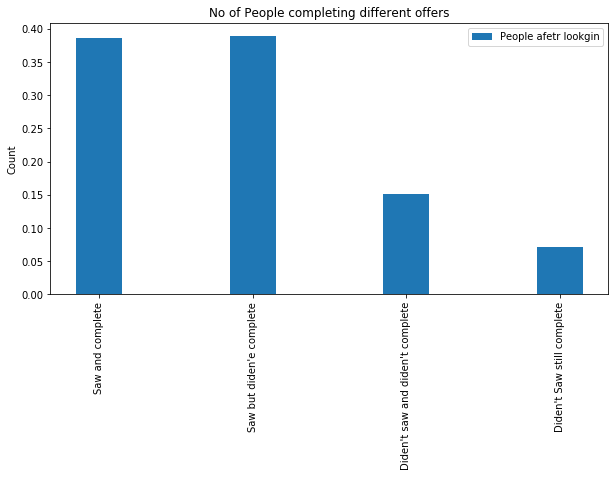

In [58]:
labels = [
    'Saw and complete',
    "Saw but diden'e complete",
    "Diden't saw and diden't complete",
    "Diden't Saw still complete",
]
men_means = [
#     Saw and complete
    transcript_portfolio_profile['success'].sum()/ len(transcript_df[transcript_df['offer received']==1]),
#   Saw but diden'e complete
    transcript_portfolio_profile['seen_notcompleted'].sum()/ len(transcript_df[transcript_df['offer received']==1]),
#   Diden't saw and diden't complete
    transcript_portfolio_profile['notseen_notcompleted'].sum()/ len(transcript_df[transcript_df['offer received']==1]),
#   Diden't Saw still complete
    transcript_portfolio_profile['notseen_completed'].sum()/ len(transcript_df[transcript_df['offer received']==1]),
]

x = np.arange(len(labels))  # the label locations

width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x, men_means, width, label='People afetr lookgin')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('No of People completing different offers')
ax.legend()
plt.xticks(rotation=90)

plt.show()

### So
38.6% people completed the offer 

38.9% people saw the offer but diden't completed it

15.1% people diden't saw the offer and diden't completed it

7.1% people diden't saw the offer yet completed it

So we need to eighte increase the difficulty of offers sent to these 7% people who are receiving offers

### Lets look at Pople who completed the offer with and without looking at the offer

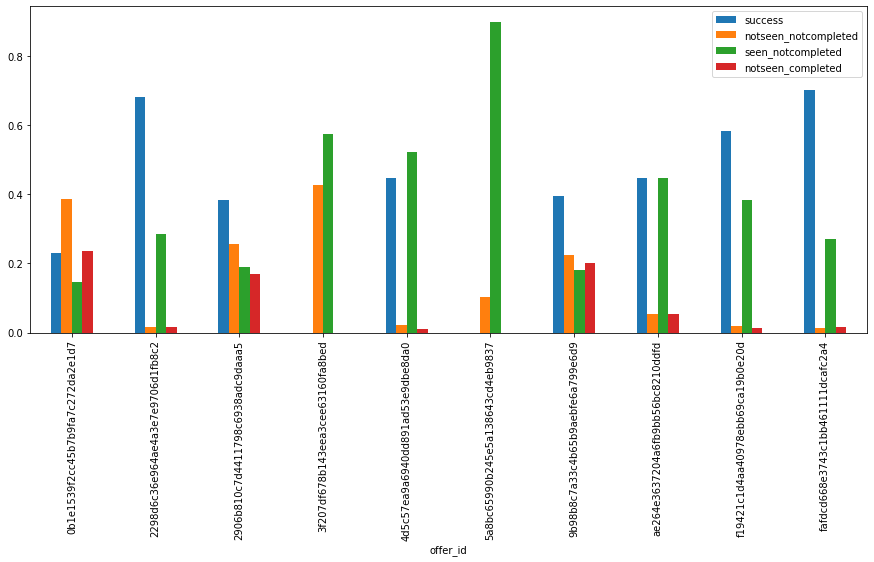

In [59]:
transcript_portfolio_profile.groupby('offer_id').mean()[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']].plot.bar(figsize=(15 ,6));

So we can see that rewards, depend quite a lot on the order itself.

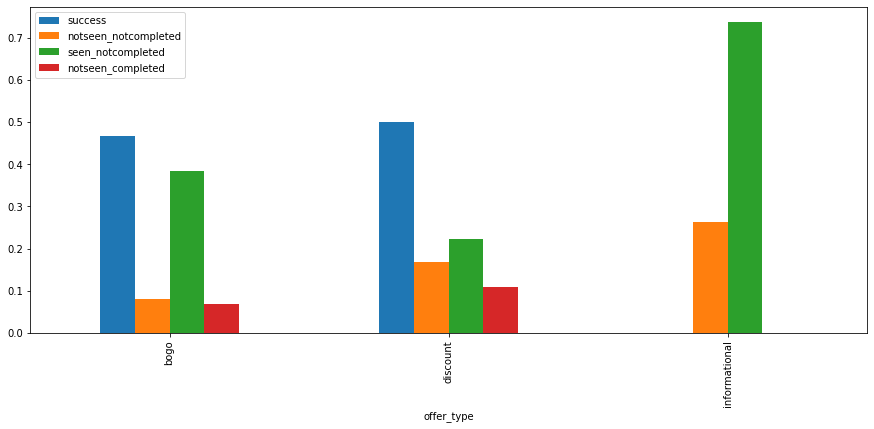

In [60]:
transcript_portfolio_profile.groupby('offer_type').mean()[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']].plot.bar(figsize=(15 ,6))

Looking at this we caan see that most perople, buy bogo offers generally after looking at the offer, and a substantial amount is still spent on people who baught the offer without looking at the offer, this ratio is higher in discounts, than in bogo, but then bogo are more expensieve, as we need to give the customers more reward for them

In [61]:
transcript_portfolio_profile[transcript_portfolio_profile['notseen_completed']==1]['reward'].sum()

20948

## Looking at offer success along side gender 

So the total loss, just because of offers which were not viewed but completed by customes is around 20948$

,success,notseen_notcompleted,seen_notcompleted,notseen_completed
gender,,,,
O,0.511053,0.097529,0.344603,0.046814
M,0.382430,0.170264,0.379302,0.068004
F,0.482462,0.123772,0.294897,0.098869


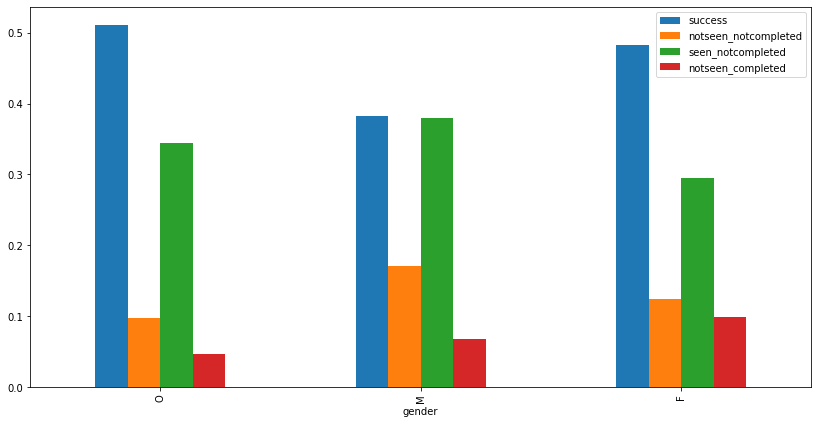

In [62]:
transcript_portfolio_profile.groupby('gender').mean().sort_values('gender', ascending=False)[[
    'success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']].plot.bar(figsize=(14 ,7));
transcript_portfolio_profile.groupby('gender').mean().sort_values('gender', ascending=False)[[
    'success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']]

## Lets see hwo it looks when we compare against different genders

Lets adde in a new column for income range, and also create dummy variables for them, this might be usefull in further analysis

In [63]:
transcript_portfolio_profile['income_range'] = pd.cut(transcript_portfolio_profile['income'], 10, include_lowest=True).astype(str)
transcript_portfolio_profile = pd.concat([transcript_portfolio_profile, pd.get_dummies(transcript_portfolio_profile['income_range'])], axis=1)
transcript_portfolio_profile.head()

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,...,"(111000.0, 120000.0]","(29909.999, 39000.0]","(39000.0, 48000.0]","(48000.0, 57000.0]","(57000.0, 66000.0]","(66000.0, 75000.0]","(75000.0, 84000.0]","(84000.0, 93000.0]","(93000.0, 102000.0]",nan
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",...,0,0,0,1,0,0,0,0,0,0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,10.50,1,1,1,0,NaN,3,"[web, email, mobile, social]",...,0,0,0,1,0,0,0,0,0,0
2,3f207df678b143eea3cee63160fa8bed,0011e0d4e6b944f998e987f904e8c1e5,0.25,0,1,1,0,NaN,0,"[web, email, mobile]",...,0,0,0,1,0,0,0,0,0,0
3,5a8bc65990b245e5a138643cd4eb9837,0011e0d4e6b944f998e987f904e8c1e5,14.75,0,1,1,0,NaN,0,"[email, mobile, social]",...,0,0,0,1,0,0,0,0,0,0
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email, mobile]",...,0,0,0,1,0,0,0,0,0,0


In [64]:
transcript_portfolio_profile.groupby('income_range').mean().sort_values('income_range', ascending=False)[[
    'success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']]

,success,notseen_notcompleted,seen_notcompleted,notseen_completed
income_range,,,,
nan,0.119142,0.165014,0.704314,0.011530
"(93000.0, 102000.0]",0.531985,0.081523,0.283844,0.102648
"(84000.0, 93000.0]",0.531145,0.078589,0.293146,0.097120
"(75000.0, 84000.0]",0.525540,0.100545,0.286493,0.087422
"(66000.0, 75000.0]",0.447819,0.136447,0.331811,0.083923
"(57000.0, 66000.0]",0.433979,0.134916,0.368270,0.062836
"(48000.0, 57000.0]",0.412516,0.152627,0.377636,0.057221
"(39000.0, 48000.0]",0.304823,0.221704,0.395338,0.078135
"(29909.999, 39000.0]",0.299876,0.227492,0.409072,0.063560


,success,notseen_notcompleted,seen_notcompleted,notseen_completed
income_range,,,,
"(102000.0, 111000.0]",0.480860,0.149974,0.208705,0.160461
"(111000.0, 120000.0]",0.479841,0.153999,0.209518,0.156642
"(29909.999, 39000.0]",0.299876,0.227492,0.409072,0.063560
"(39000.0, 48000.0]",0.304823,0.221704,0.395338,0.078135
"(48000.0, 57000.0]",0.412516,0.152627,0.377636,0.057221
"(57000.0, 66000.0]",0.433979,0.134916,0.368270,0.062836
"(66000.0, 75000.0]",0.447819,0.136447,0.331811,0.083923
"(75000.0, 84000.0]",0.525540,0.100545,0.286493,0.087422
"(84000.0, 93000.0]",0.531145,0.078589,0.293146,0.097120


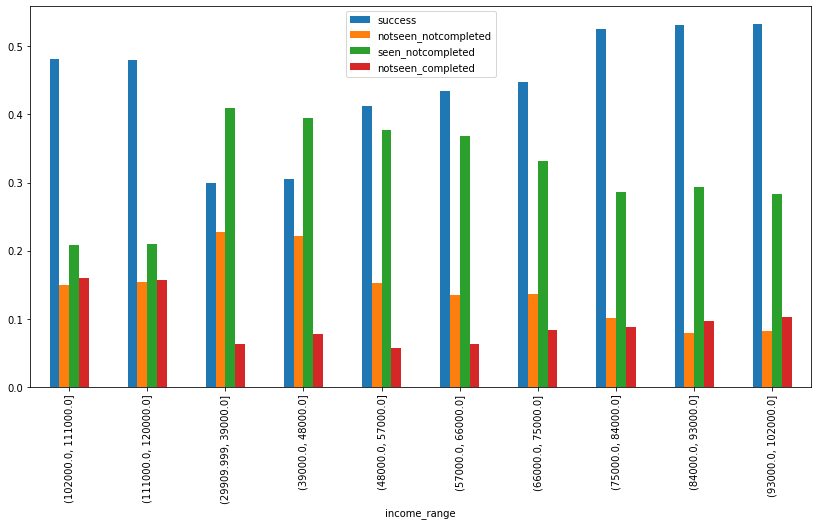

In [65]:
transcript_portfolio_profile.groupby('income_range').mean()[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']
].drop('nan').plot.bar(figsize=(14 ,7))
transcript_portfolio_profile.groupby('income_range').mean()[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']
]

,success,notseen_notcompleted,seen_notcompleted,notseen_completed
income_range,,,,
nan,0.119142,0.165014,0.704314,0.011530
"(29909.999, 39000.0]",0.299876,0.227492,0.409072,0.063560
"(39000.0, 48000.0]",0.304823,0.221704,0.395338,0.078135
"(48000.0, 57000.0]",0.412516,0.152627,0.377636,0.057221
"(57000.0, 66000.0]",0.433979,0.134916,0.368270,0.062836
"(66000.0, 75000.0]",0.447819,0.136447,0.331811,0.083923
"(75000.0, 84000.0]",0.525540,0.100545,0.286493,0.087422
"(84000.0, 93000.0]",0.531145,0.078589,0.293146,0.097120
"(93000.0, 102000.0]",0.531985,0.081523,0.283844,0.102648


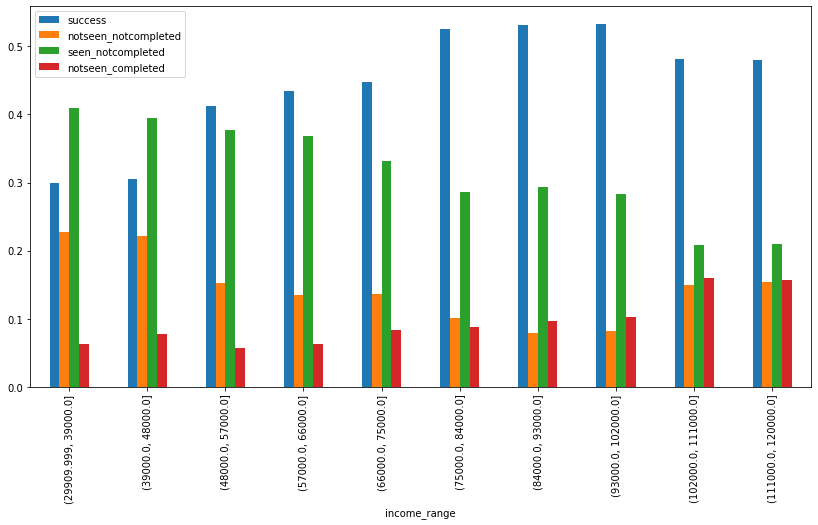

In [66]:
def tosort_by_income(x):
    try:
        return float(x.split(',')[0][1:])
    except Exception:
        return -1
    
transcript_portfolio_profile['to_sort'] = transcript_portfolio_profile[
    'income_range'].apply(tosort_by_income).astype(float)


transcript_portfolio_profile.groupby('income_range').mean().sort_values('to_sort')[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']
].drop('nan').plot.bar(figsize=(14 ,7))


transcript_portfolio_profile.groupby('income_range').mean().sort_values('to_sort')[
    ['success', 'notseen_notcompleted', 'seen_notcompleted' ,'notseen_completed']
]

In [67]:
transcript_portfolio_profile.drop('to_sort', inplace=True, axis=1)

Looking at the data we can see that success rate increases quite substantually for people with income in between 75,000-102,000, and from 102,000-111,000 it seems that people are completing offer but they have not seen it 

# Preparing data for ML 

In [68]:
# Creating dummy variables for channels, and droping channels
transcript_portfolio_profile = transcript_portfolio_profile.join(
    transcript_portfolio_profile['channels'].str.join('|').str.get_dummies()
)
transcript_portfolio_profile.head()

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,...,"(57000.0, 66000.0]","(66000.0, 75000.0]","(75000.0, 84000.0]","(84000.0, 93000.0]","(93000.0, 102000.0]",nan,email,mobile,social,web
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",...,0,0,0,0,0,0,1,0,0,1
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,10.50,1,1,1,0,NaN,3,"[web, email, mobile, social]",...,0,0,0,0,0,0,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,0011e0d4e6b944f998e987f904e8c1e5,0.25,0,1,1,0,NaN,0,"[web, email, mobile]",...,0,0,0,0,0,0,1,1,0,1
3,5a8bc65990b245e5a138643cd4eb9837,0011e0d4e6b944f998e987f904e8c1e5,14.75,0,1,1,0,NaN,0,"[email, mobile, social]",...,0,0,0,0,0,0,1,1,1,0
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email, mobile]",...,0,0,0,0,0,0,1,1,0,1


In [69]:
# Creating dummy variables for offer_type, and droping offer_type 
offer_types = pd.get_dummies(transcript_portfolio_profile['offer_type'])
transcript_portfolio_profile = transcript_portfolio_profile.merge(
    offer_types, left_index=True, right_index=True)
transcript_portfolio_profile.drop('offer_type', axis=1, inplace=True)

# Make dummy variables for gender
transcript_portfolio_profile = transcript_portfolio_profile.join(pd.get_dummies(
    transcript_portfolio_profile['gender']))
transcript_portfolio_profile.drop('gender', axis=1, inplace=True)

transcript_portfolio_profile.head()

,offer_id,profile_id,time,offer completed,offer received,offer viewed,transaction,amount,reward,channels,...,email,mobile,social,web,bogo,discount,informational,F,M,O
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email]",...,1,0,0,1,0,1,0,0,0,1
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0011e0d4e6b944f998e987f904e8c1e5,10.50,1,1,1,0,NaN,3,"[web, email, mobile, social]",...,1,1,1,1,0,1,0,0,0,1
2,3f207df678b143eea3cee63160fa8bed,0011e0d4e6b944f998e987f904e8c1e5,0.25,0,1,1,0,NaN,0,"[web, email, mobile]",...,1,1,0,1,0,0,1,0,0,1
3,5a8bc65990b245e5a138643cd4eb9837,0011e0d4e6b944f998e987f904e8c1e5,14.75,0,1,1,0,NaN,0,"[email, mobile, social]",...,1,1,1,0,0,0,1,0,0,1
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,24.00,1,1,1,0,NaN,5,"[web, email, mobile]",...,1,1,0,1,1,0,0,0,0,1


In [70]:
transcript_portfolio_profile.columns

Index(['offer_id', 'profile_id', 'time', 'offer completed', 'offer received',
       'offer viewed', 'transaction', 'amount', 'reward', 'channels',
       'difficulty', 'duration', 'success', 'notseen_notcompleted',
       'seen_notcompleted', 'notseen_completed', 'age', 'id',
       'became_member_on', 'income', 'income_range', '(102000.0, 111000.0]',
       '(111000.0, 120000.0]', '(29909.999, 39000.0]', '(39000.0, 48000.0]',
       '(48000.0, 57000.0]', '(57000.0, 66000.0]', '(66000.0, 75000.0]',
       '(75000.0, 84000.0]', '(84000.0, 93000.0]', '(93000.0, 102000.0]',
       'nan', 'email', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational', 'F', 'M', 'O'],
      dtype='object')

In [71]:
transcript_portfolio_profile.isnull().any()

offer_id                False
profile_id              False
time                    False
offer completed         False
offer received          False
offer viewed            False
transaction             False
amount                   True
reward                  False
channels                False
difficulty              False
duration                False
success                 False
notseen_notcompleted    False
seen_notcompleted       False
notseen_completed       False
age                     False
id                      False
became_member_on        False
income                   True
income_range            False
(102000.0, 111000.0]    False
(111000.0, 120000.0]    False
(29909.999, 39000.0]    False
(39000.0, 48000.0]      False
(48000.0, 57000.0]      False
(57000.0, 66000.0]      False
(66000.0, 75000.0]      False
(75000.0, 84000.0]      False
(84000.0, 93000.0]      False
(93000.0, 102000.0]     False
nan                     False
email                   False
mobile    

In [72]:
transcript_portfolio_profile['income'] = transcript_portfolio_profile['income'].fillna(
    transcript_portfolio_profile['income'].mean())

In [73]:
x = transcript_portfolio_profile[[
    'M', 'F', 'O', 'duration', 'age', 'income', 'email', 'mobile', 'social', 'web', 'bogo', 'discount',
    'informational', 
]]
y = transcript_portfolio_profile['success']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.33, 
    random_state=42
)

## Creating our model

In [75]:
random_forest_clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
random_forest_clf.fit(X_train, y_train);
y_predict = random_forest_clf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     12875
           1       0.64      0.60      0.62      8011

    accuracy                           0.72     20886
   macro avg       0.70      0.70      0.70     20886
weighted avg       0.71      0.72      0.71     20886



Hmm we have to increase the accuracy of our model

## Increasing models accuracy

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[50,350],
    "max_depth":[8, ],  
    "random_state":[20, 40],
}

model = GridSearchCV(random_forest_clf, param_grid=parameters, verbose=1, n_jobs=-1) 
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False,
                                              rando

In [77]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     12875
           1       0.67      0.72      0.69      8011

    accuracy                           0.76     20886
   macro avg       0.74      0.75      0.75     20886
weighted avg       0.76      0.76      0.76     20886



Thats better :)

### Conclusion

- Does the offer it self affect how customers interact with it
    The answer is yes off cause the offer affect how people interact within
- Does type of offer determine how customers interact with it
    It dose to some extend but when it comes to discounts vs gobo, its not big of a deal
- Does gender play a role in how customer react to offers
    It does as we see all genders seem to have different reaction to offers as we saw women seem to have higher chance of buying something without looking at the offer, also they have the owes rejection rate when they see an offer, so may be the key is to send them offers with higher difficulty, where as men seem not to check the offer that much, so may be we can try to get more channels to reach them
- Does income of the customer affect how they respond to offers
    It does actual 75,000–102,000 seems to be the sweet spot, and from 102,000–111,000 seem to filled with people who complete offers even tho they never saw it
- Can we create a model which can predict how a customers will react to an offer
    Yes we can even tho the model, created over here does not  have the best score we can improve it, and it could be quite useful